# Main
メイン処理

In [1]:
from ColorMap import *
from DE import *
from tqdm import tqdm 
import pandas as pd
import cv2

In [2]:
D = 2 #入力次元数
N = 50 #集団サイズ
G = 200 #総世代数
sum_g = 0 #合計世代数
up_lim = 5.0
lo_lim = -5.0
func = griewank_function
CR = 0.5
F = 0.5
de = DE(D, N, up_lim, lo_lim, func, CR, F)
de.init_phase()

In [3]:
color_map =  ColorMap(griewank_function, [-6, 6], [-6, 6] ,400, 400)
color_map.generate_coordinate()

 10%|█         | 20/200 [00:03<00:35,  5.02it/s]/Users/minorim_n/Documents/ForSchool/MyPy/DE/ColorMap.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
100%|██████████| 200/200 [00:40<00:00,  4.95it/s]


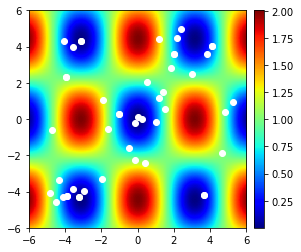

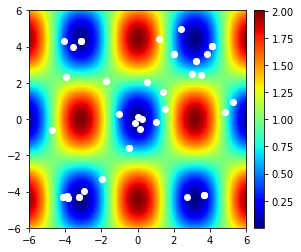

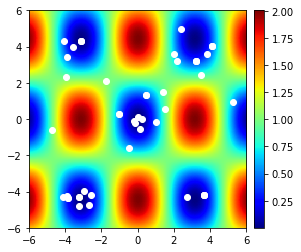

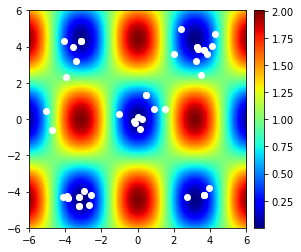

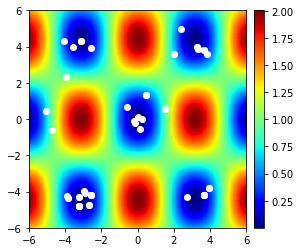

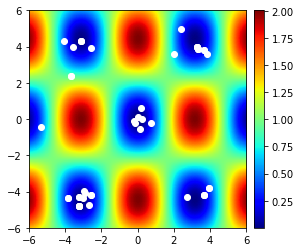

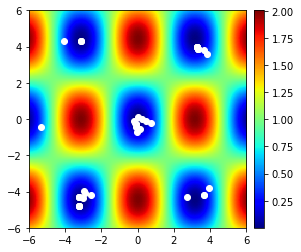

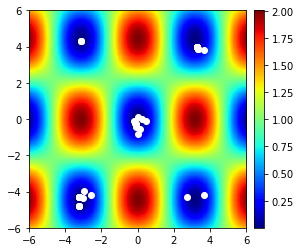

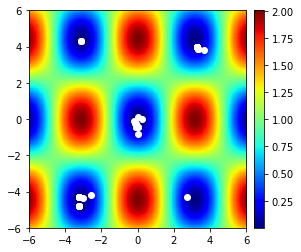

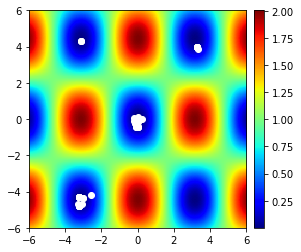

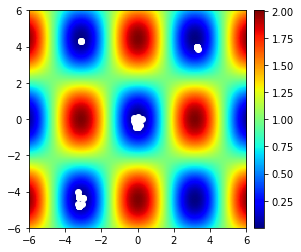

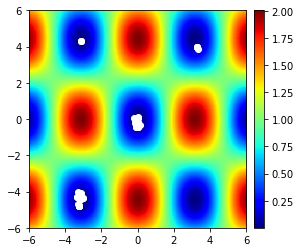

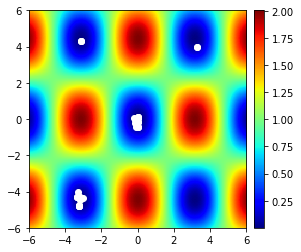

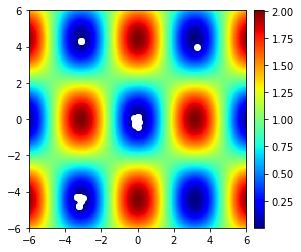

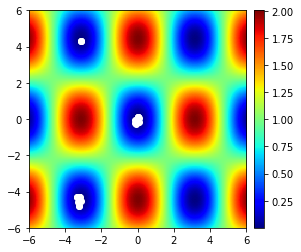

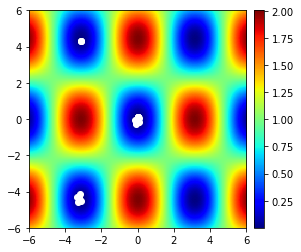

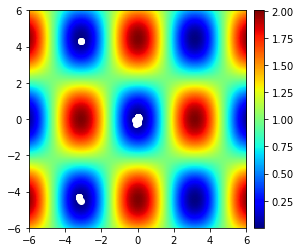

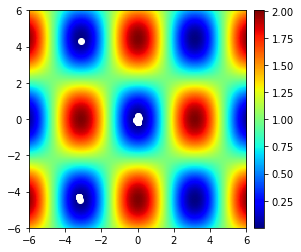

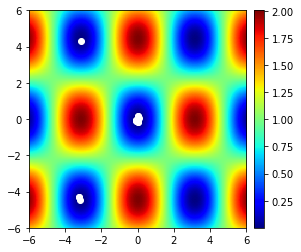

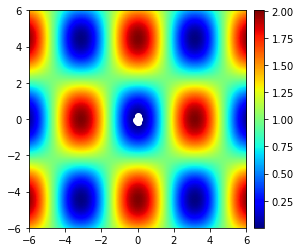

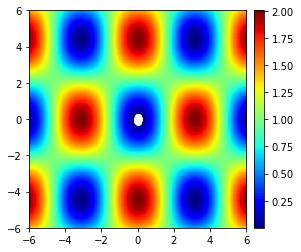

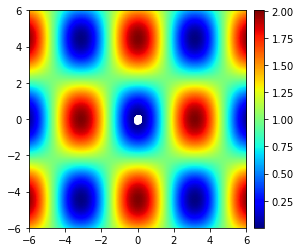

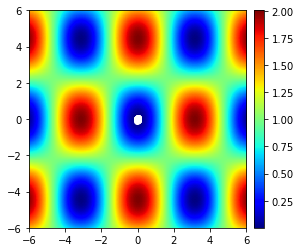

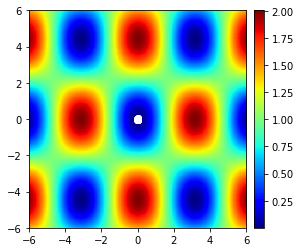

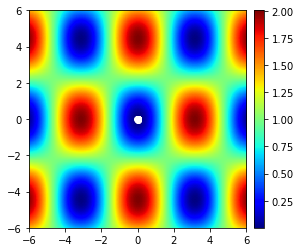

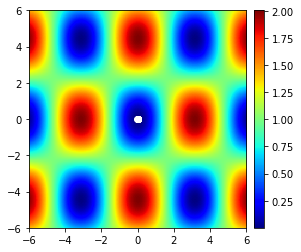

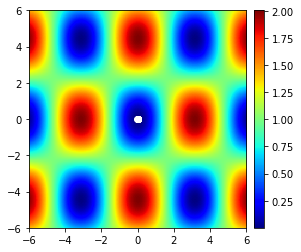

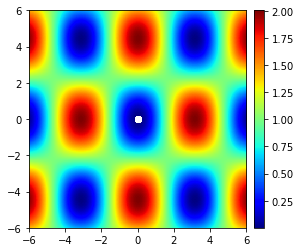

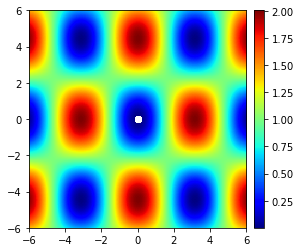

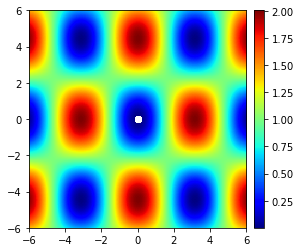

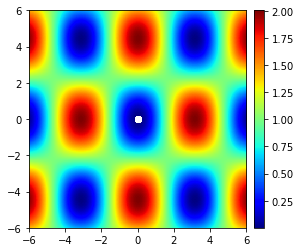

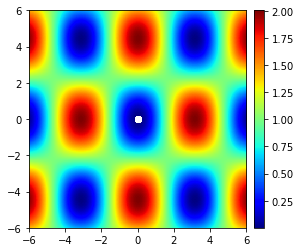

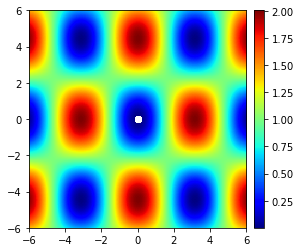

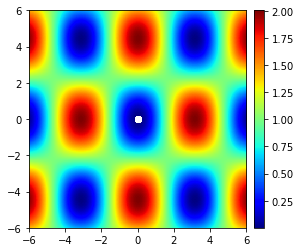

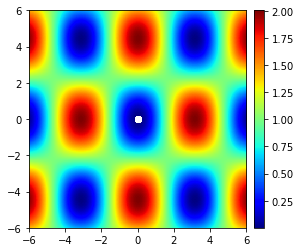

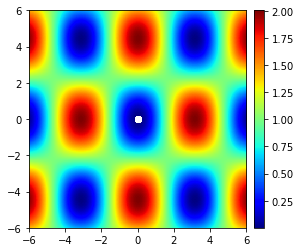

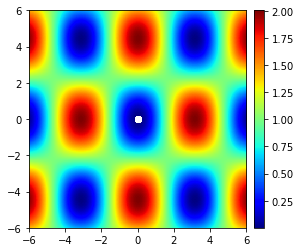

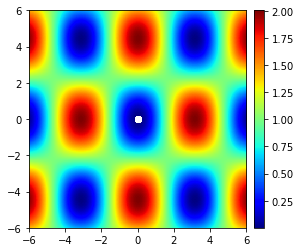

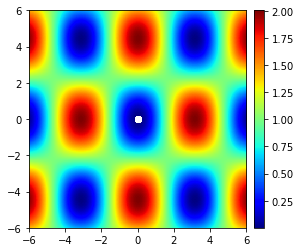

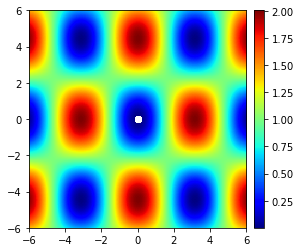

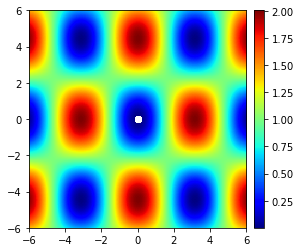

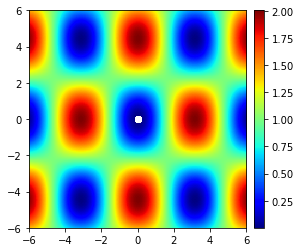

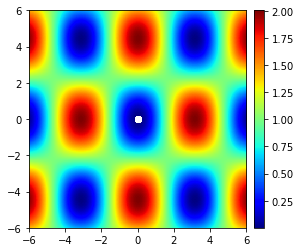

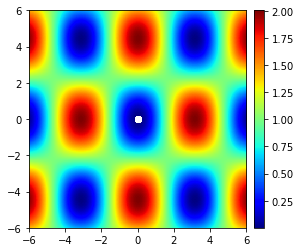

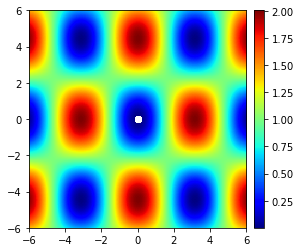

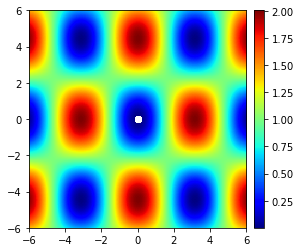

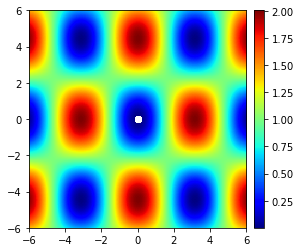

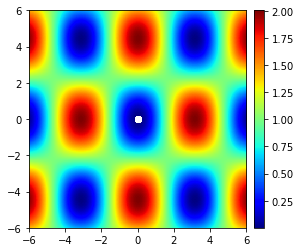

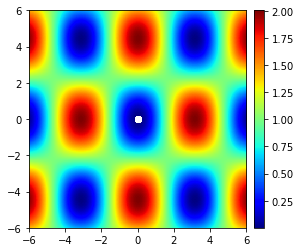

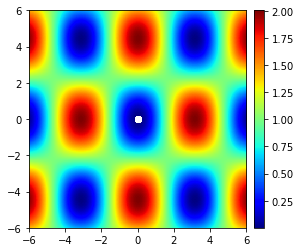

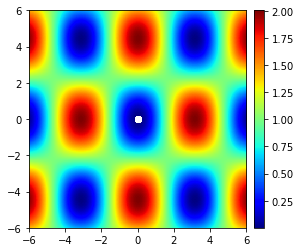

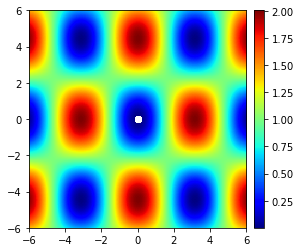

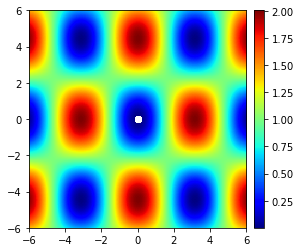

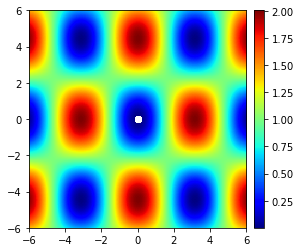

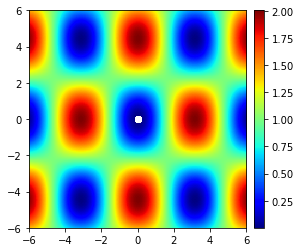

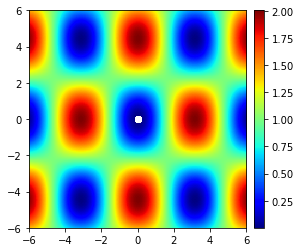

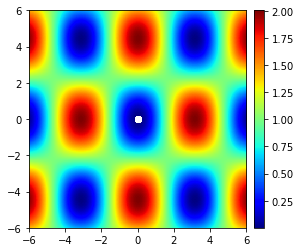

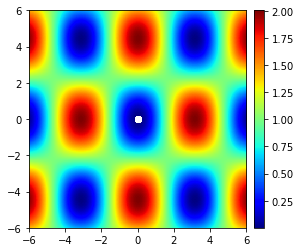

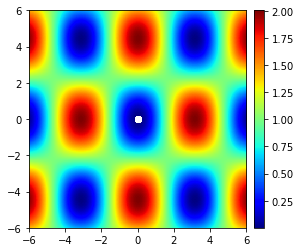

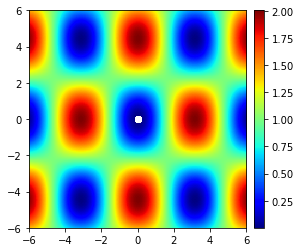

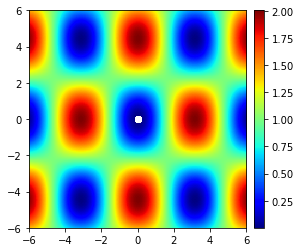

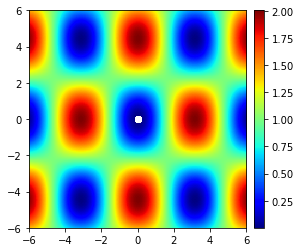

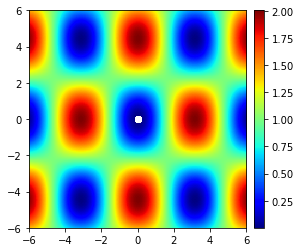

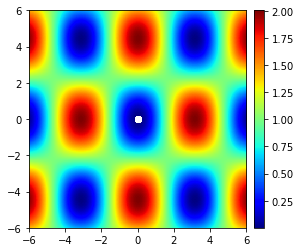

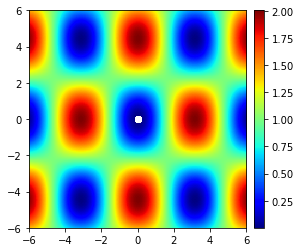

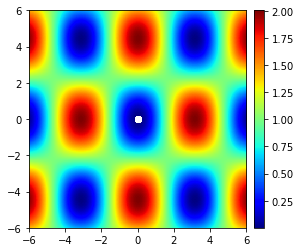

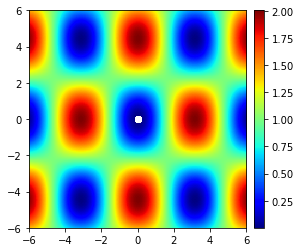

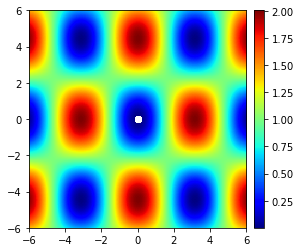

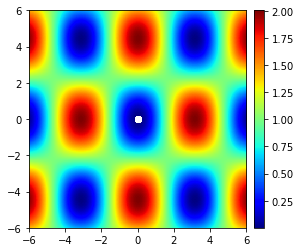

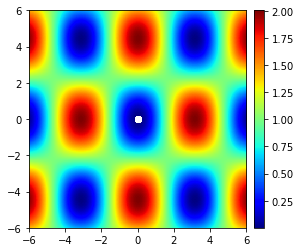

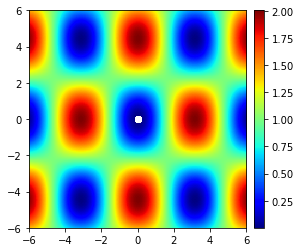

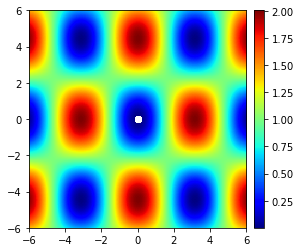

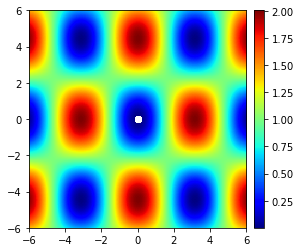

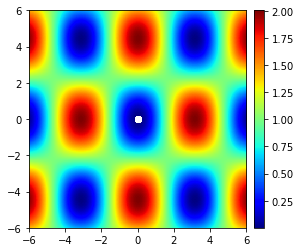

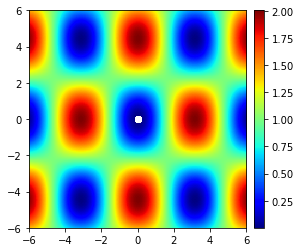

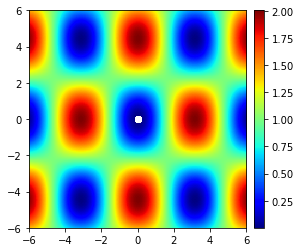

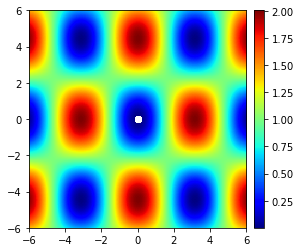

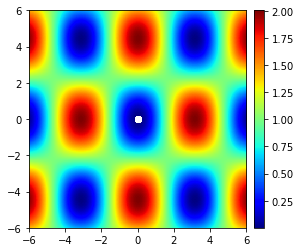

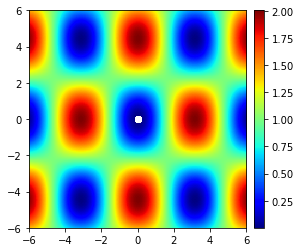

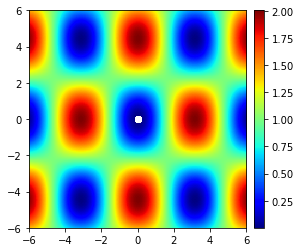

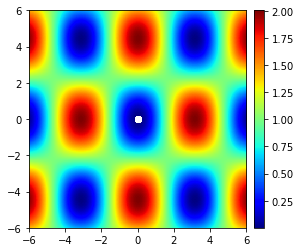

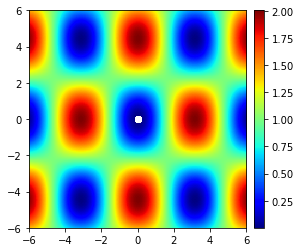

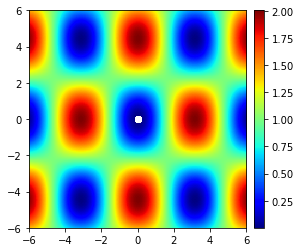

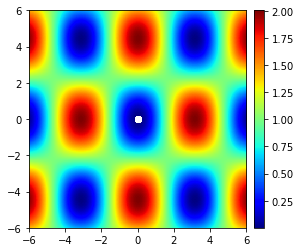

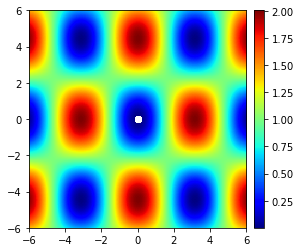

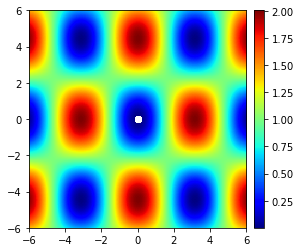

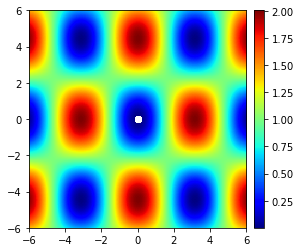

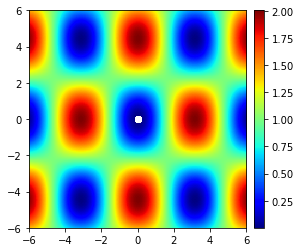

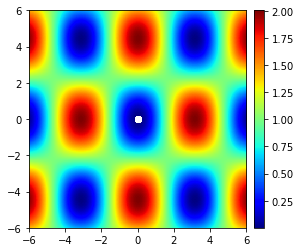

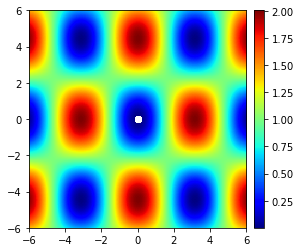

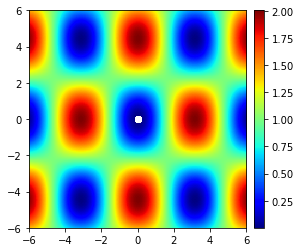

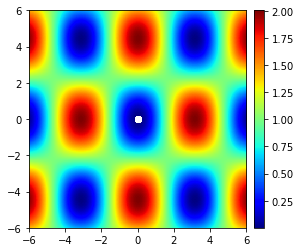

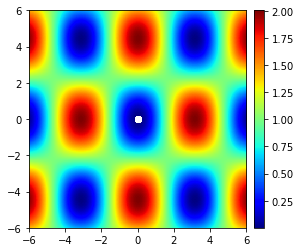

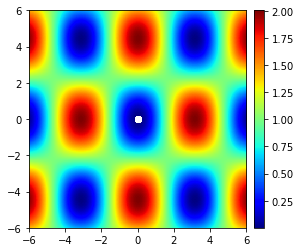

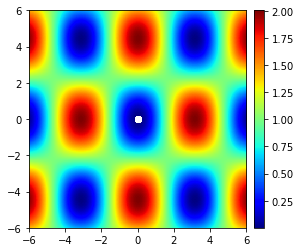

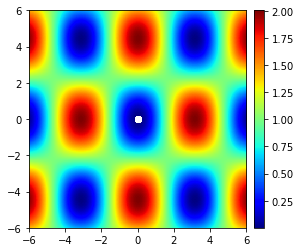

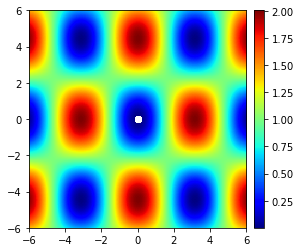

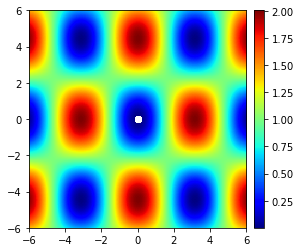

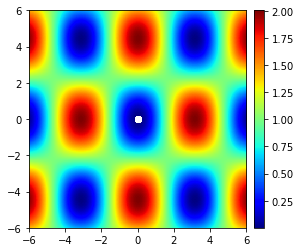

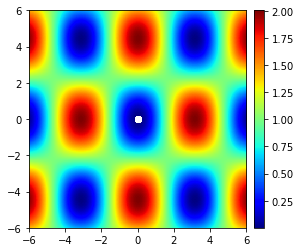

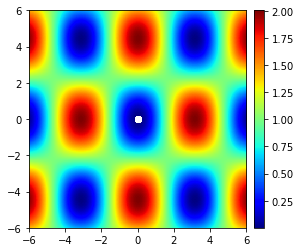

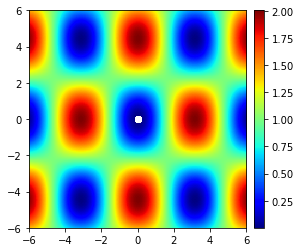

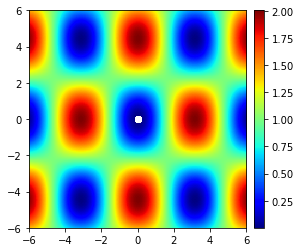

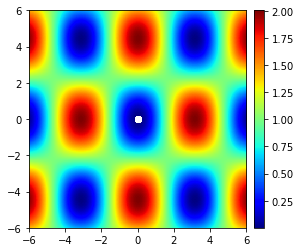

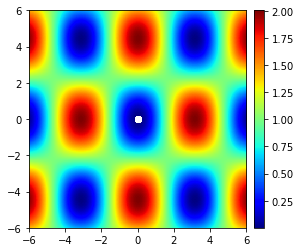

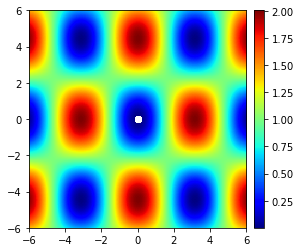

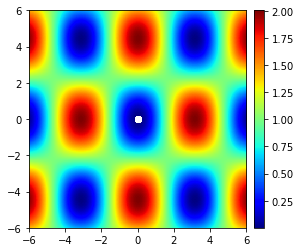

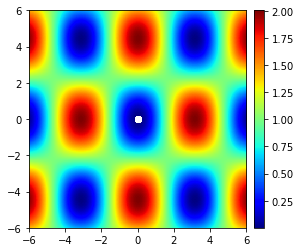

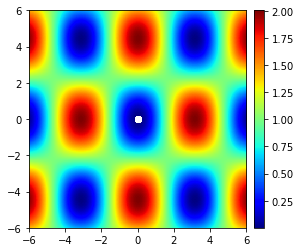

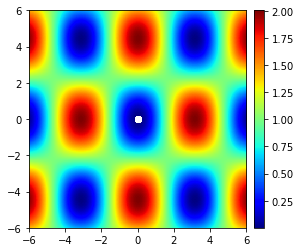

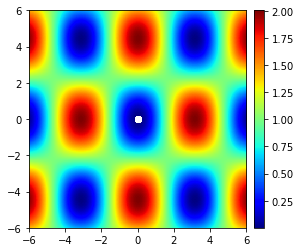

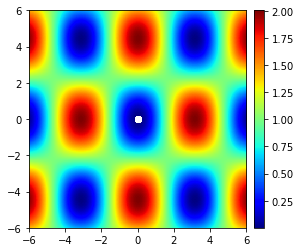

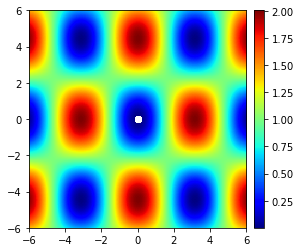

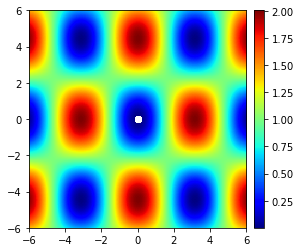

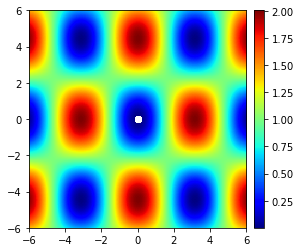

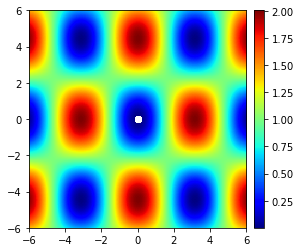

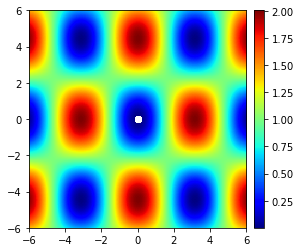

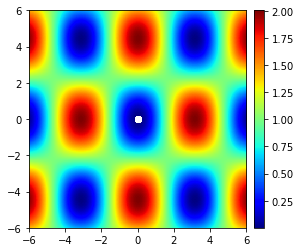

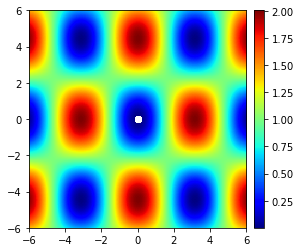

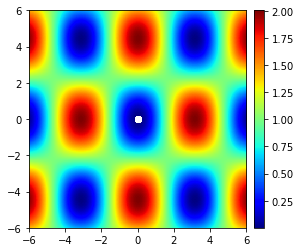

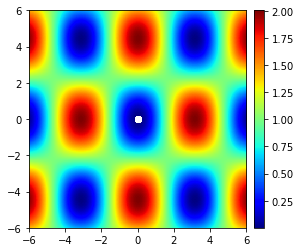

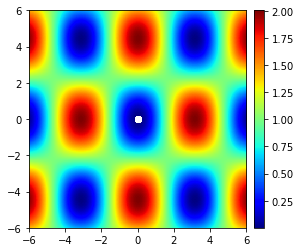

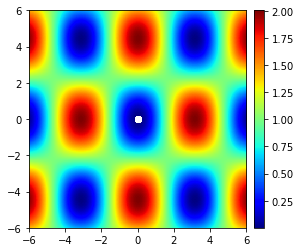

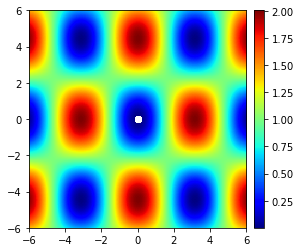

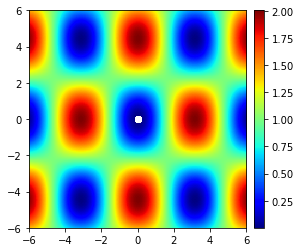

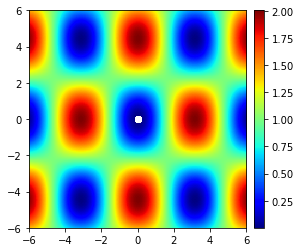

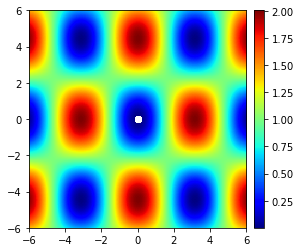

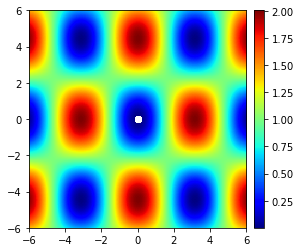

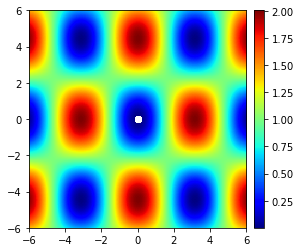

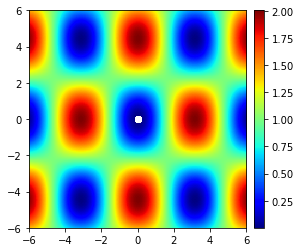

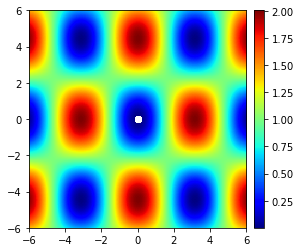

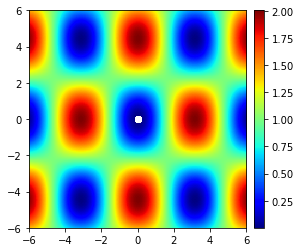

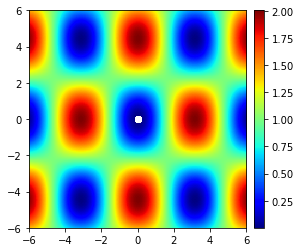

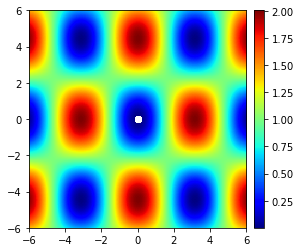

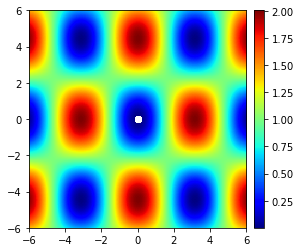

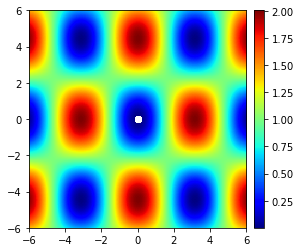

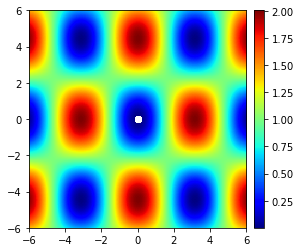

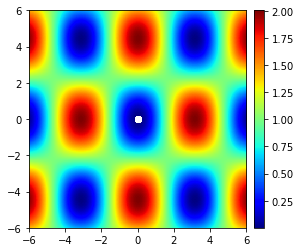

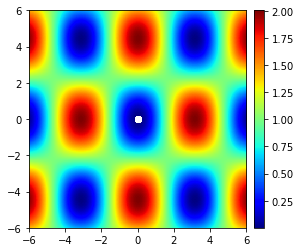

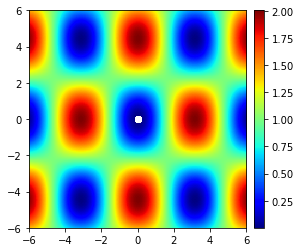

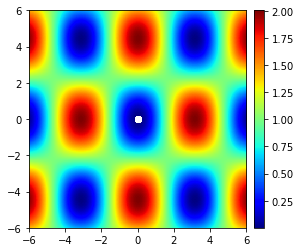

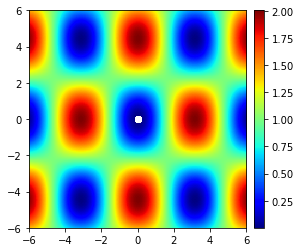

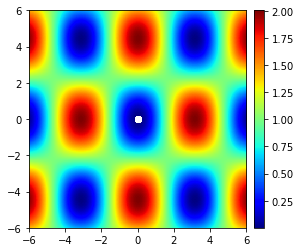

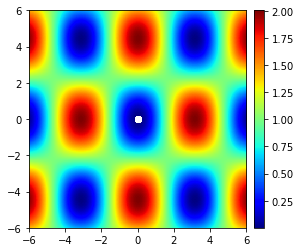

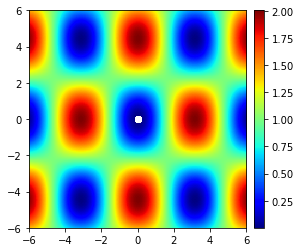

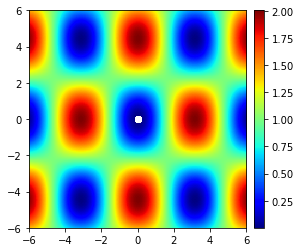

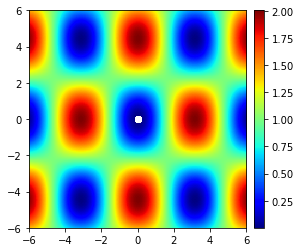

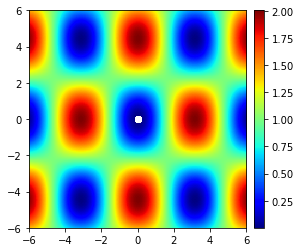

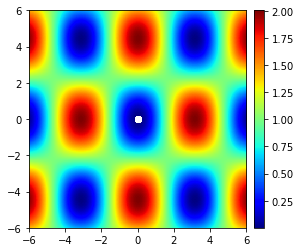

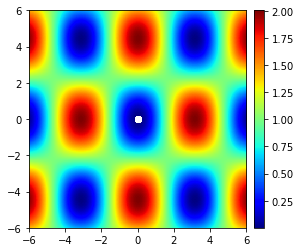

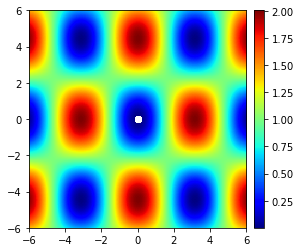

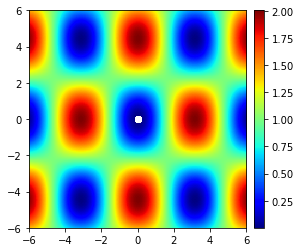

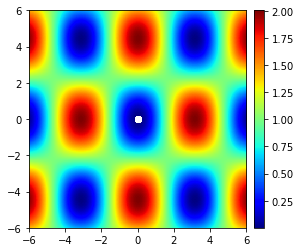

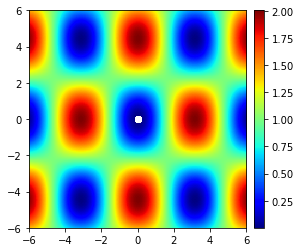

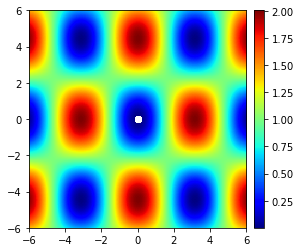

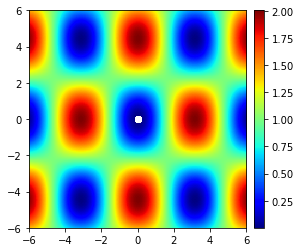

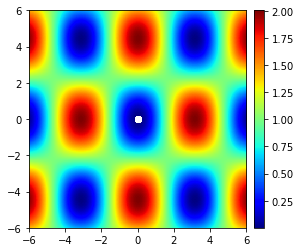

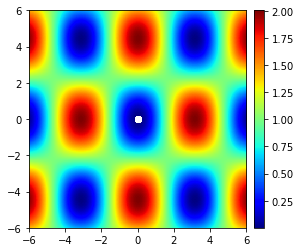

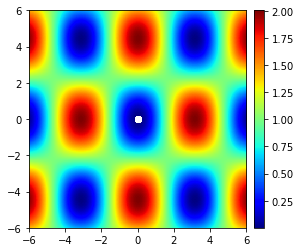

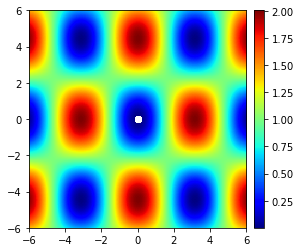

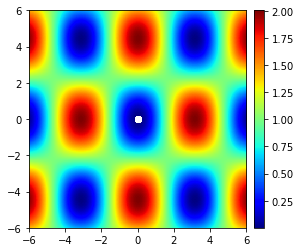

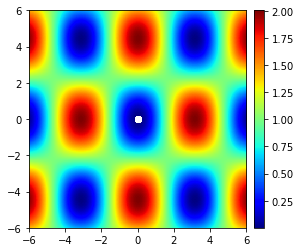

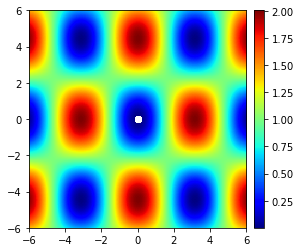

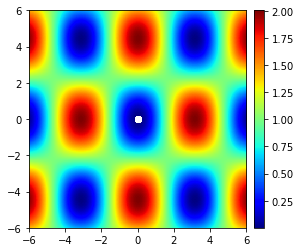

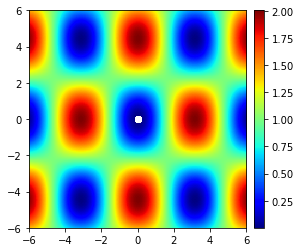

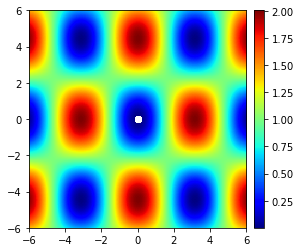

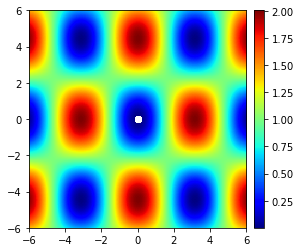

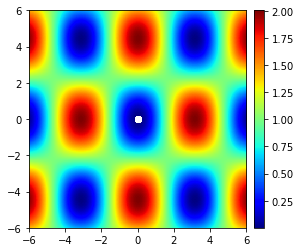

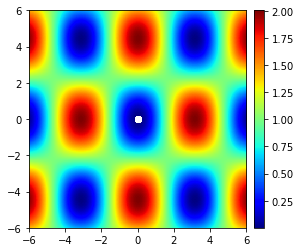

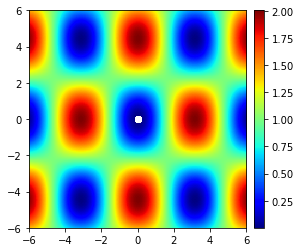

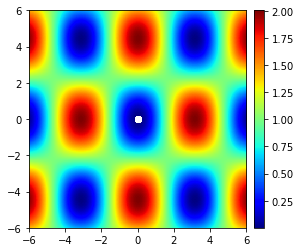

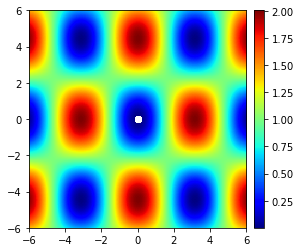

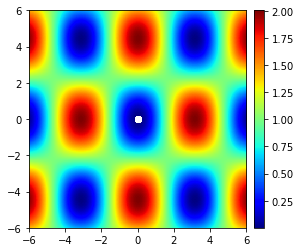

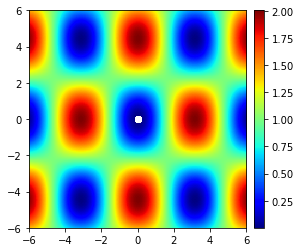

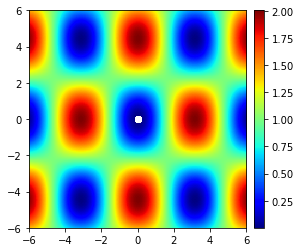

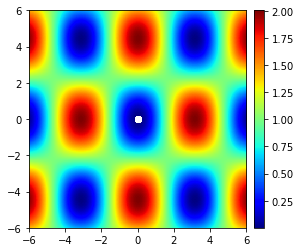

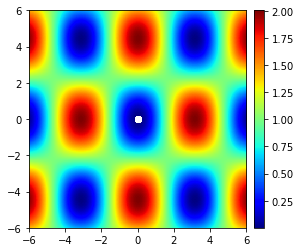

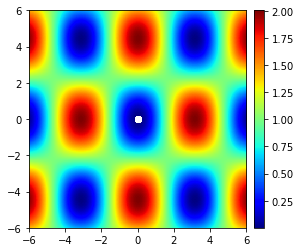

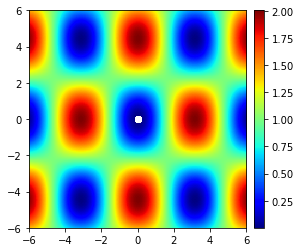

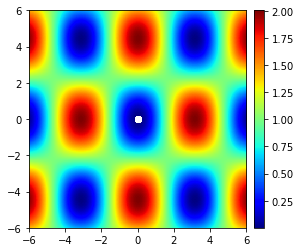

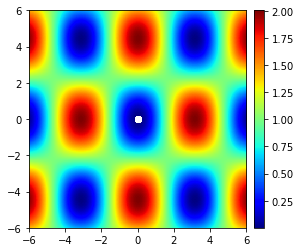

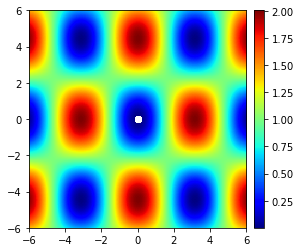

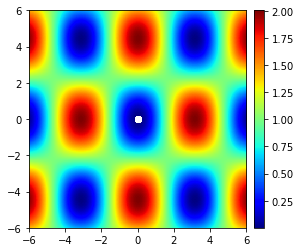

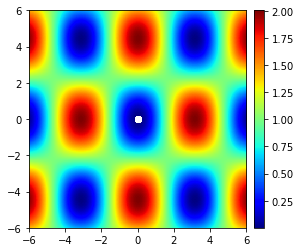

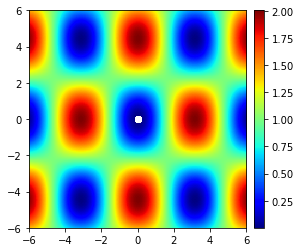

Error in callback <function flush_figures at 0x1142f4c20> (for post_execute):


KeyboardInterrupt: 

In [4]:
for g in tqdm(range(G)):
    de.solution_search_phase()
    color_map.draw_map()
    pd_xs = pd.DataFrame(de.xs)
    color_map.draw_points(pd_xs[0], pd_xs[1], 'white')    
    plt.savefig('output/images/img_' + str(sum_g + g)+ '.png')
sum_g = sum_g + G

In [5]:
#結果出力(動画)
# encoder(for mp4)
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
# output file name, encoder, fps, size(fit to image size)
video = cv2.VideoWriter('video.mp4',fourcc, 20.0, (432, 288))
if not video.isOpened():
    print("can't be opened")
    exit()
    
for i in tqdm(range(0, sum_g)):
    # hoge0000.png, hoge0001.png,..., hoge0090.png
    img = cv2.imread('output/images/img_' + str(i)+ '.png')

    # can't read image, escape
    if img is None:
        print("can't read")
        break

    # add
    video.write(img)
#     print("read image " + str(i))

video.release()
print('written')

100%|██████████| 200/200 [00:00<00:00, 348.52it/s]

written
